# COMP8325 Week 4 Workshop
# Unsupervised Learning: Clustering
* ### Demos for clustering models
* ### Task 1 Perform K-means on a real dataset
* ### Task 2 Perform agglomerative clustering on this data set
* ### Task 3 (Optional) Try PCA for dimensionality reduction.


In [2]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, adjusted_rand_score

from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 

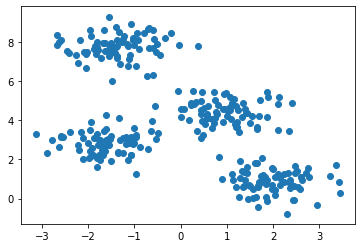

In [3]:
# Generate an exmaple 2-dimensional datasets containing 4 clusters for a demo
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize the data
plt.scatter(X[:,0], X[:,1])
plt.show()

## Demo for K-means clustering

In [4]:
# Create a K-means clustering model with k=4, and k-means++ as the intialization strategy
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)

# Perform clustering by fitting the model with the data
kmeans.fit(X)

# We can explore the parameters learned from the data. 
# What's the cluster center? 
print('\n Cluter center: \n', kmeans.cluster_centers_)

# What's is overall distorion (inertia)? 
print('\n Overall distortion: \n', kmeans.inertia_)
# Average standard distortion
print('\n Average distortion: \n', math.sqrt(kmeans.inertia_/X.shape[0]))


 Cluter center: 
 [[ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]

 Overall distortion: 
 212.00599621083472

 Average distortion: 
 0.8406465690384489


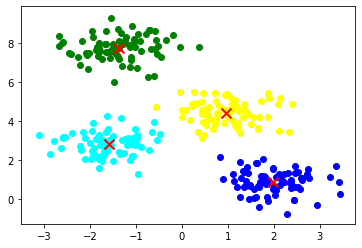

In [5]:
# Predict the cluster for each data instance. This step can be combined with the last one by using kmeans.fit_predict(X)
y_pred = kmeans.predict(X)

# Visualize the cluster centers to explore how the clustering result looks like
colors = ['blue', 'yellow', 'green', 'cyan']
for i, color in enumerate(colors):
    plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1], c=color)
     
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', lw=2, c='red', s=100)
plt.show()

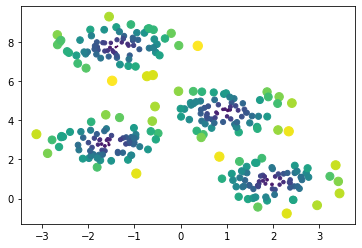

array([1.7094301 , 0.34643087, 0.71089317, 0.35987414, 1.24744716,
       1.5762086 , 1.25393534, 0.46553376, 1.35099586, 1.12277792,
       0.13853169, 1.42892966, 0.30491735, 1.21161844, 1.04050425,
       0.67819681, 0.16352094, 0.6887623 , 0.59857495, 0.80503142,
       0.84590109, 0.37931209, 0.65462808, 0.41262325, 0.40299057,
       1.53051391, 0.28510814, 0.458739  , 1.39870687, 0.85792198,
       0.86833807, 0.77993074, 0.95326785, 1.01640349, 0.3294435 ,
       1.09225091, 0.69702786, 1.26968281, 0.71142252, 0.37878514,
       0.86993597, 0.87313749, 1.45185214, 0.63029603, 0.38807979,
       0.5659329 , 0.34904572, 0.09094542, 0.21270846, 0.64208565,
       0.74827535, 0.53293815, 0.49800089, 0.30716724, 1.20900635,
       0.47382396, 1.33287804, 0.96343692, 0.43384882, 0.59311631,
       0.99244857, 0.39010803, 1.53941848, 0.55974474, 0.5932707 ,
       0.40056711, 1.11149825, 0.39582014, 1.29692504, 0.39315875,
       0.4432534 , 1.20475434, 0.45673638, 0.14491089, 0.91053

In [6]:
# Transform X to a cluster-distance space. In the new space, each dimension is the distance to the cluster centers. 
# In this way, the size and the colour show the distance of a data instance to its cluster centre
X_new=kmeans.transform(X)

scores=X_new.min(axis=1)

plt.scatter(X[:, 0], X[:, 1], marker="o", c=scores, s=50*scores)
plt.show()

scores

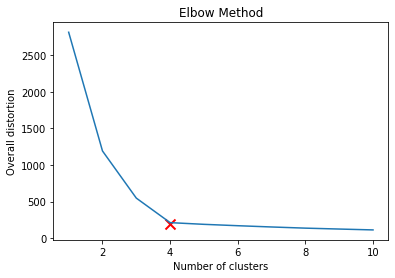

In [7]:
# How about other k values? Which k value should we choose to get the optimal clustering? Let's vary k from 1 to 10 and see how the distortion changes.
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    
# Plot the relationship between the distortion and k. Then, we can have the Elbow method to help identify a good value for k.
plt.plot(range(1, 11), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Overall distortion')
plt.scatter(4, distortions[4], marker='x', lw=2, c='red', s=100)
plt.show()

# It can be seen that k=4 is reasonably good

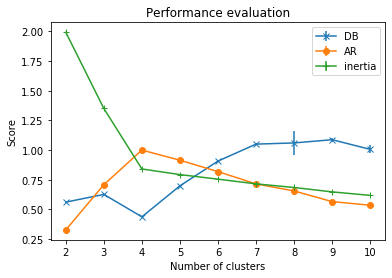

In [8]:
# Let's evaluate the learned model with other quality criteria

# Internal evaluation, davies bouldin score (the lower, the better)
db_scores = []
db_scores_std = []

# External evaluation, adjusted rand index (the higher, the better)
ar_scores = []
ar_scores_std = []

# Inertia (average standardized)
inertia = []
inertia_std = []

for i in range(2, 11):
    # Multiple runs for stable indicators
    db_scores_tmp = []
    ar_scores_tmp = []
    inertias_tmp = []
    
    n_iteration=5
    for j in range(0, n_iteration):
        # Note: 'random_state' parameter should be set as default or None
        #kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
        kmeans = KMeans(n_clusters=i, init='random', max_iter=300)
        kmeans.fit(X)
        labels = kmeans.labels_
        db_scores_tmp.append(davies_bouldin_score(X, labels))
        ar_scores_tmp.append(adjusted_rand_score(labels, y_pred))
        inertias_tmp.append(math.sqrt(kmeans.inertia_/X.shape[0]))
    
    db_scores.append(np.mean(db_scores_tmp))
    db_scores_std.append(np.std(db_scores_tmp))
    ar_scores.append(np.mean(ar_scores_tmp))
    ar_scores_std.append(np.std(ar_scores_tmp))
    inertia.append(np.mean(inertias_tmp))
    inertia_std.append(np.std(inertias_tmp))

# Plot the relationship between the davies bouldin score and k
plt.errorbar(range(2, 11), db_scores, yerr=db_scores_std, marker='x', label='DB')
plt.errorbar(range(2, 11), ar_scores, yerr=ar_scores_std, marker='o', label='AR')
plt.errorbar(range(2, 11), inertia, yerr=inertia_std, marker='+', label='inertia')
plt.title('Performance evaluation')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

## Demo for agglomerative clustering

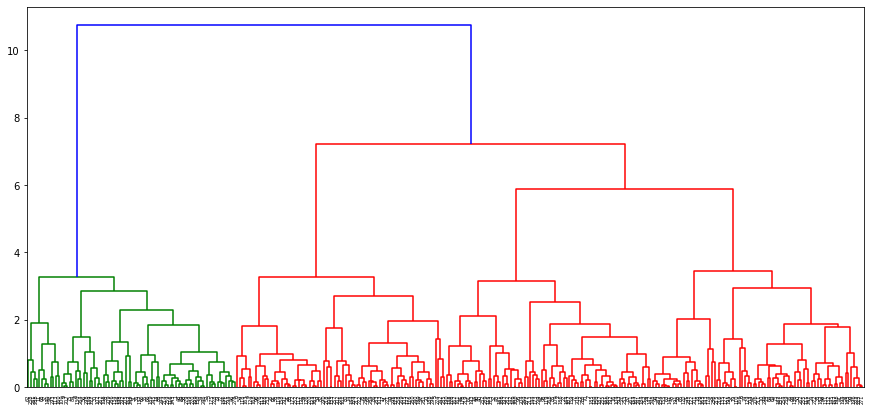

In [9]:
# Try agglomerative clustering on this dataset, and visualise the hierarchy.

dist = pdist(X, 'euclidean')
linkage_matrix = linkage(dist, method = 'complete')

plt.figure(figsize=(15,7))
dendrogram(linkage_matrix)
plt.show()

# It can be seen that the clustering structure contains four main clusters, complying with the data.

## Demo of Clustering on a real data set - MNIST
Now, let's work on a real dataset. See detailed information for the dataset: https://en.wikipedia.org/wiki/MNIST_database.

In [10]:
#Load the data. Orignal data set has been processed (downsampled) to facilitate your data analysis
raw_data = pd.read_csv("mnist-0.1.csv")
print('\n data size: (%d, %d)\n' % raw_data.shape)

# Specifying features and target attribute
X = raw_data.drop(['Label'], axis='columns')

# Pre-processing with standardization
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_data = X.values
X_scaled = scaler.fit_transform(X_data)
X = X_scaled

y = raw_data['Label'].values


 data size: (5243, 785)



In [11]:
# K-means clustering model with 2 clusters are assumed.
model = KMeans(n_clusters=2)
model.fit(X)
print('\n cluster means: \n', model.cluster_centers_)
print('\n inertia: %f'% model.inertia_)
print('\n average inertia: %f\n' % math.sqrt(model.inertia_/y.size))


 cluster means: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

 inertia: 214710.126187

 average inertia: 6.399357



In [12]:
# Evaluation (internal)
labels = model.labels_
scores=davies_bouldin_score(X, labels)
print('\n davies_bouldin_score: %f\n' % scores)


 davies_bouldin_score: 2.722454



## Task 1 Try k from 2 to 10 to determine which is the best value w.r.t. davies_bouldin_score, plot the relationship between the davies_bouldin_score and k



In [13]:
# Build the models

# Compute davies bouldin score
    
# Plot the relationship between the distortion and k


## Task 2 Try to perform agglomerative clustering on the dataset, and visualise the hierarchy.

In [14]:
# Add your code here ...


## Task 3 (Optional) Given that this is a high dimensional data. It might be good to reduce the dimension first. PCA can be used for this purpose. Try some reduced dimensionality, e.g., math.sqrt(X.shape[1]). Try this for different k values with plotting.

In [15]:
# Perform dimenion redcution
from sklearn.decomposition import PCA

# Build clustering models

# Compute davies bouldin score
    
# Plot the relationship between the score and k
